### Importação das bibliotecas

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from joblib import dump, load
from graphviz import Graph, Digraph
import numpy as np
import pandas as pd
import graphviz
import warnings

warnings.filterwarnings('ignore')

### Tratamento dos dados

In [11]:
# Definimos o ssed dos valores aleatórios para 25
np.random.seed(25)

# Importamos os dados do dataset
arquivo = pd.read_csv('drug200.csv')

# Mapeamos as conversões de nomes e valores do dataset
rename_columns = {
    "Age" : "Idade",
    "Sex" : "Sexo",
    "BP" : "PS",
    "Cholesterol" : "Colesterol",
    "Na_to_K" : "Sodio_Potassio",
    "Drug" : "Remédio"
}

rename_classes = {
    "drugA" : "A",
    "drugB" : "B",
    "drugC" : "C",
    "drugX" : "X",
    "DrugY" : "Y",
}

rename_sexo = {
    "F" : 0,
    "M" : 1
}

rename_levels = {
    "LOW" : 1,
    "NORMAL" : 2,
    "HIGH" : 3,
}

# Renomeamos as colunas para português
arquivo = arquivo.rename(columns=rename_columns)

# Convertemos os valores textuais para numéricos
arquivo.loc[:, "Sexo"] = arquivo.loc[:, "Sexo"].map(rename_sexo)
arquivo.loc[:, "PS"] = arquivo.loc[:, "PS"].map(rename_levels)
arquivo.loc[:, "Colesterol"] = arquivo.loc[:, "Colesterol"].map(rename_levels)
arquivo.loc[:, "Remédio"] = arquivo.loc[:, "Remédio"].map(rename_classes)

# Atribuímos as variáveis para X e a classe para Y
x = arquivo[["Idade", "Sexo", "PS", "Sodio_Potassio", "Colesterol"]]
y = arquivo["Remédio"]

# Normalizamos os dados numéricos
# scaler = MinMaxScaler()
# colunas_numeircas = x[["Idade", "PS", "Sodio_Potassio", "Colesterol"]].values
# dados_normalizados = scaler.fit_transform(colunas_numeircas)
# x[["Idade", "PS", "Sodio_Potassio", "Colesterol"]] = dados_normalizados



# x.head()


### Visualização de métricas para análise

A média de Colesterol é: 2.515
A moda de Colesterol é: 3


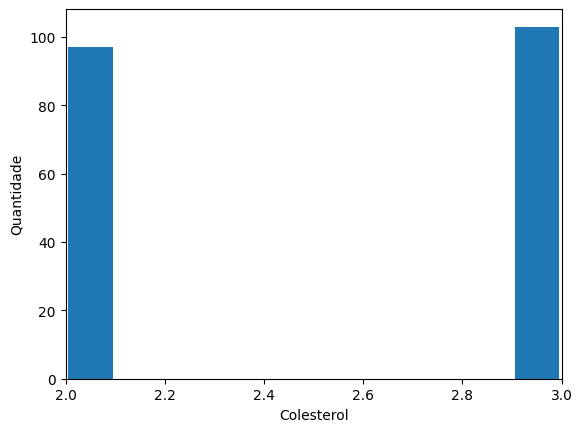

In [18]:
# Plotamos histogramas para verificar a distribuição dos dados

coluna = "Colesterol"
plt.hist(x[coluna], rwidth=0.9)
plt.xlim([min(x[coluna]), max(x[coluna])])
plt.xlabel(coluna)
plt.ylabel("Quantidade")

media = x[coluna].mean()
moda = x[coluna].mode()[0]

print('A média de ' + coluna + ' é: ' + str(media))
print('A moda de ' + coluna + ' é: ' + str(moda))


### Relação de métricas entre os dados

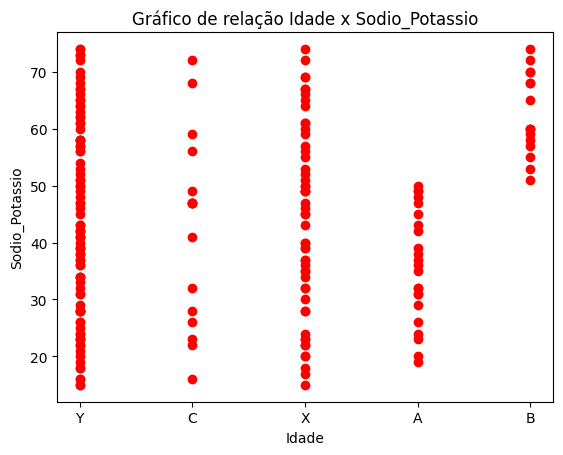

In [17]:
# Plotamos um gráfico que mostra a relação entre duas colunas do dataset
eixoX = "Idade"
eixoY = "Sodio_Potassio"

plt.scatter(x[eixoX], y, color='red', label='Conjunto 1')

# Definir os rótulos dos eixos e título
plt.xlabel(eixoX)
plt.ylabel(eixoY)
plt.title('Gráfico de relação ' + eixoX + " x " + eixoY)

# Adicionar legenda
# plt.legend()

# Exibir o gráfico
plt.show()

### Treinamento do modelo e medida de acurácia

A acurácia foi de 98.33%
A predição para a pessoa inserida foi: Y


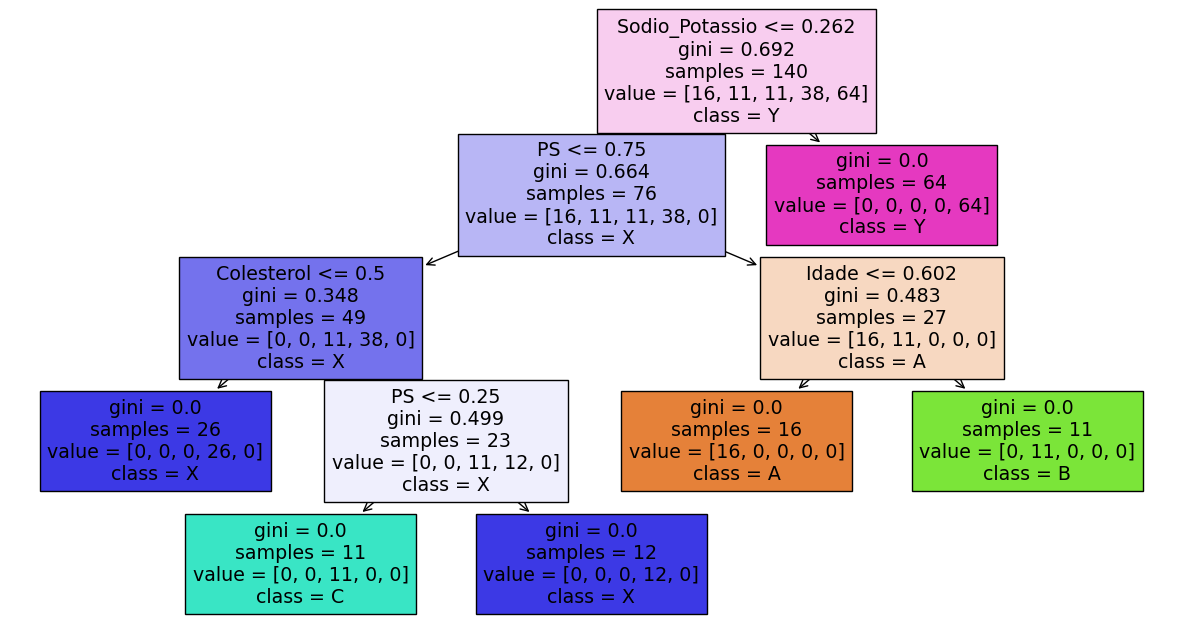

In [99]:
# Separamos o treino e o teste para as variáveis e para o alvo
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, stratify=y)

# Geramos a árvore de decisão utilizando gini como critério de cálculo de IG
clf = tree.DecisionTreeClassifier(criterion="gini")

#Treinamos o modelo utilizando treino X e treino Y
clf.fit(train_x, train_y)

# Predizemos o conteúdo do teste X
predict = clf.predict(test_x)
# print(predict)

# Calculamos a ácurácia comparando a predição realizada com os valores reais de teste Y
acuracia = accuracy_score(test_y, predict)
print("A acurácia foi de " + f"{acuracia * 100:.2f}" + "%")

# Salvamos o modelo treinado em um arquivo
dump(clf, 'modelo_dd.joblib')

# Carregamos o modelo e testamos uma predição
modelo = load('modelo_dd.joblib')
predict1 = modelo.predict([[0.7, 0.2, 0.2, 0.3, 0.6]])
print("A predição para a pessoa inserida foi: " + str(predict1[0]))

plt.figure(figsize=(15, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names=["A", "B", "C", "X", "Y"], filled=True)

# Salvamos a figura da árvore em um arquivo
# plt.savefig('tree.png')